In [34]:
%pylab inline

import pandas as pd
import numpy as np
import seaborn as sns

from scipy import stats

Populating the interactive namespace from numpy and matplotlib


# Calculus Warmup

먼저 시작에 앞서 기초적인 calculus 에 대해서 설명하고 들어가겠습니다.<br>
일단 integral 은 다음과 같이 정의 할 수 있습니다.

$$ \begin{align} \int^b_a f(x) dx &= \text{area under the curve. y = f(x)} \\
\int^b_a f(x) dx &= \text{sum of f(x) dx}
\end{align} $$

위 두개의 공식을 연결짓는 것은 다음과 같은 원리 입니다.

$$ \text{area} \sim \text{sum of retangle areas} = 
f(x_1) \Delta x + f(x_2) \Delta x + ... + f(x_n) \Delta x = \sum^n_{i=1} f(x_i) \Delta x $$

여기서 $ \Delta x $ 의 간격이 좁아지면 좁아질 수록, 면적에 대한 approximation은 더 근접해지게 됩니다.

![Sum of Rectables](images/integral.png)

# Continuous Random Variables

높이, 무게, 온도, 당신이 회사의 매일 지각을 하는 시간.. 등등 이런 연속성을 갖는 데이터는 모두 continuous random variables이라고 할 수 있습니다.<br>
어떤 중학교의 남자의 키, 여자의 몸무게, 4월 한달간의 온도, 당신이 지각하는 시간.. 어떤 의미로는 observations이라고 할 수도 있습니다. 


# Distribution Estimation

Distribution에 대해서 추정하는 방법은 다음과 같이 합니다.

dist: <scipy.stats._continuous_distns.expon_gen object at 0x7f2359ee0898>
mean: 0.0010300760381091224
std : 72.20962477661135


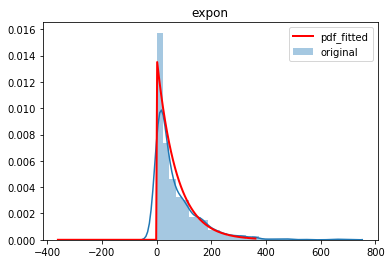

In [262]:
def estimate_distribution(data, dist_name, x_size=200):
    dist = getattr(stats, dist_name)
    params = dist.fit(data)
    
    mean = params[-2]
    std = params[-1]
    
    esti_x = np.linspace(-mean-std*5, mean+std*5, x_size)
    esti_y = dist.pdf(esti_x, *params[:-2], loc=mean, scale=std)
    
    sns.distplot(x, bins=30, norm_hist=False, label='original')
    sns.lineplot(esti_x, esti_y, color='red', linewidth=2, label='pdf_fitted')
    plt.title(dist_name)
    return dist, mean, std

x = np.random.gamma(0.7, 100, size=1000)
dist, mean, std = estimate_distribution(x, 'expon')
print('dist:', dist)
print('mean:', mean)
print('std :', std)

dist: <scipy.stats._continuous_distns.norm_gen object at 0x7f2359ec6ef0>
actual mean: 5
actual std : 10
estimated mean: 5.277021564806046
std : 10.139698388217056


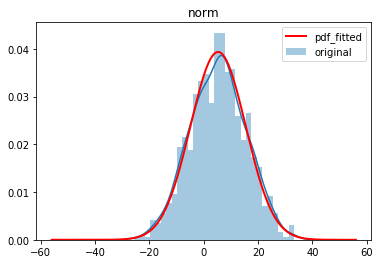

In [264]:
x = np.random.normal(5, 10,  1000)
dist, mean, std = estimate_distribution(x, 'norm')
print('dist:', dist)
print('actual mean: 5')
print('actual std : 10')
print('estimated mean:', mean)
print('std :', std)

# Gamma Distribution

Beta distribution과 유사하나, Beta distribution의 경우 0~1상이의 값을 갖


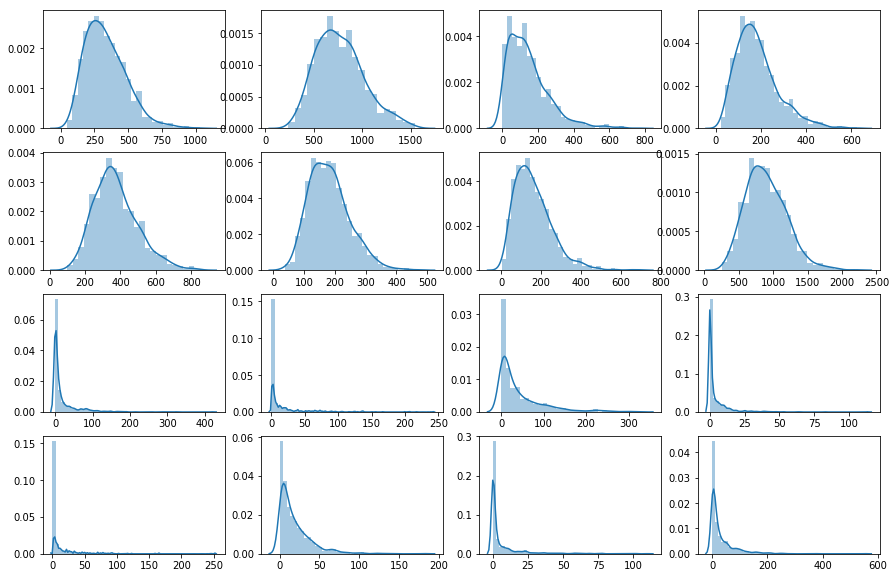

In [104]:
def visualize_gamma():
    fig, plots = plt.subplots(4, 4, figsize=(15, 10))
    
    plots = plots.reshape(-1)
    for i, plot in enumerate(plots):
        if i < 8:
            x = np.random.gamma(np.random.randint(100) / 10, 
                                np.random.randint(100), size=1000)
        else:
            x = np.random.gamma(np.random.ranf(), 
                                np.random.randint(100), size=1000)
        sns.distplot(x, ax=plot)
    
visualize_gamma()

mean: 2.1165346027707896e-05 std: 2.564117787335898
mean: 1.0
std : 1.0
var : 1.0


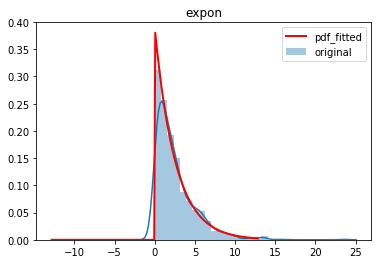

In [246]:
x = np.random.exponential(2.5, size=1000)
dist = estimate_distribution(x, 'expon')
print('mean:', dist.mean())
print('std :', dist.std())
print('var :', dist.var())

In [239]:
stats.exponnorm

## Skewed Normal Distribution